March 20

Just playing around with mne function and trying to see how I can get a higher/lower phase lag by using functions (sin and sin with translation) that I can control by how much to shift the phases diff

In [19]:
import numpy as np
import h5py
import mne
import helper_functions as hf
import wc_model_sim_functions as wc
import mne
import matplotlib.pyplot as plt
%matplotlib inline

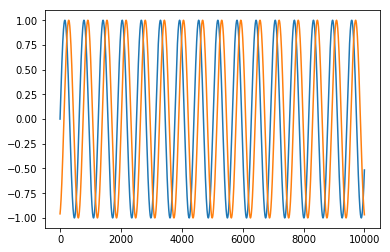

In [90]:
sfreq = 1000  # Sampling frequency
times = np.arange(0, 10, 1/sfreq)  # Use 10000 samples (10s)

sin = np.sin(times * 10)  # Multiplied by 10 for shorter cycles
sin_inphase = np.sin(times * 10)
sin_outphase = np.sin((times * 10)+5)
plt.plot(sin)
plt.plot(sin_outphase)
plt.show()

In [91]:
# Numpy array of size 3 X 10000.
data = np.array([sin, sin_outphase])
#data = np.array([sin, sin])

# Definition of channel types and names.
ch_names = ['sin', 'sin_out']

In [92]:
# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, sfreq=sfreq)

Creating RawArray with float64 data, n_channels=2, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


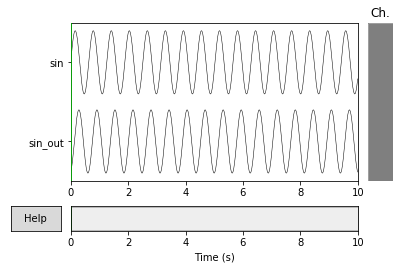

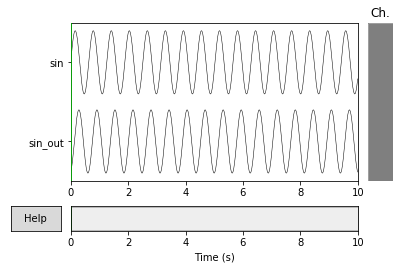

In [93]:
raw = mne.io.RawArray(data, info)

# It is also possible to auto-compute scalings
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=2, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

In [94]:
# The events are spaced evenly every 1 second.
duration = 1.
event_id =1

# create a fixed size events array
# start=0 and stop=None by default
events = mne.make_fixed_length_events(raw, event_id, duration=duration)
print(events)

# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

# create :class:`Epochs <mne.Epochs>` object
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, baseline=None, verbose=True)



[[   0    0    1]
 [1000    0    1]
 [2000    0    1]
 [3000    0    1]
 [4000    0    1]
 [5000    0    1]
 [6000    0    1]
 [7000    0    1]
 [8000    0    1]
 [9000    0    1]]
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


In [107]:
_con, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=epochs,method='pli', sfreq=sfreq, mode = 'fourier')

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1 connections
    using t=0.000s..0.990s for estimation (991 points)
    frequencies: 6.1Hz..499.5Hz (490 points)
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


In [108]:
_con.shape

(2, 2, 490)

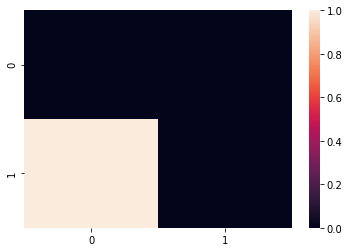

In [109]:
import seaborn as sns
sns.heatmap(_con[:,:,2], vmin = 0, vmax =1)

In [98]:
f = 10/2*np.pi

In [99]:
f

15.707963267948966

In [100]:
sin.shape

(10000,)

In [101]:
chunks= []
len_of_chunk = 1000
num_chunks = int(sin.shape[0]/len_of_chunk)

for ch in range(num_chunks):
    chunks.append(data[:,ch*len_of_chunk:ch*len_of_chunk + len_of_chunk])

In [79]:
num_chunks

10

In [86]:
_con, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=chunks,method='wpli', sfreq=sfreq, fmin = 13, fmax =17, mode = 'fourier', faverage = True)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1 connections
    using t=0.000s..0.999s for estimation (1000 points)
    frequencies: 13.0Hz..17.0Hz (5 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


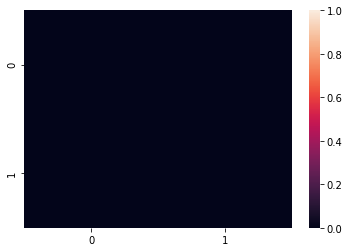

In [87]:
import seaborn as sns
sns.heatmap(_con[:,:,0], vmin = 0, vmax =1)

In [82]:
data

array([[ 0.        ,  0.00999983,  0.01999867, ..., -0.53200348,
        -0.5235096 , -0.51496337],
       [ 0.        ,  0.00999983,  0.01999867, ..., -0.53200348,
        -0.5235096 , -0.51496337]])

In [83]:
chunks

[array([[ 0.        ,  0.00999983,  0.01999867, ..., -0.51860795,
         -0.527132  , -0.53560333],
        [ 0.        ,  0.00999983,  0.01999867, ..., -0.51860795,
         -0.527132  , -0.53560333]]),
 array([[-0.54402111, -0.55238449, -0.56069262, ...,  0.90029383,
          0.90460157,  0.90881885],
        [-0.54402111, -0.55238449, -0.56069262, ...,  0.90029383,
          0.90460157,  0.90881885]]),
 array([[ 0.91294525,  0.91698036,  0.92092376, ..., -0.99221389,
         -0.99091885, -0.98952471],
        [ 0.91294525,  0.91698036,  0.92092376, ..., -0.99221389,
         -0.99091885, -0.98952471]]),
 array([[-0.98803162, -0.98643973, -0.9847492 , ...,  0.76478303,
          0.75830201,  0.75174517],
        [-0.98803162, -0.98643973, -0.9847492 , ...,  0.76478303,
          0.75830201,  0.75174517]]),
 array([[ 0.74511316,  0.73840664,  0.73162627, ..., -0.29120143,
         -0.28162041, -0.27201123],
        [ 0.74511316,  0.73840664,  0.73162627, ..., -0.29120143,
        

In [85]:
chunks[0].shape

(2, 1000)